# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data['year']=data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour']= data['datetime'].dt.hour
data['minute']= data['datetime'].dt.minute
data['second']= data['datetime'].dt.second

In [28]:
data['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

가설.....

1. 봄 가을에 대여량이 높을 것이다. season 1,3
2. Holiday에 대여량이 높을 것이다.
3. registered의 대여량이 높을 것이다.
4. temp는 20~30에서 높을 것이다.

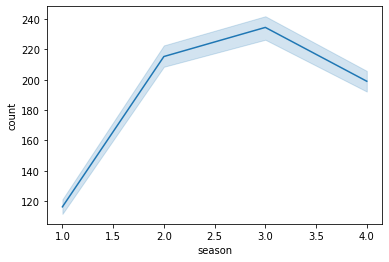

In [41]:
sns.lineplot(x='season', y='count', data=data)

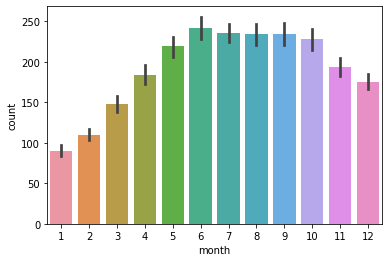

In [24]:
sns.barplot(x=data['month'], y='count', data=data)

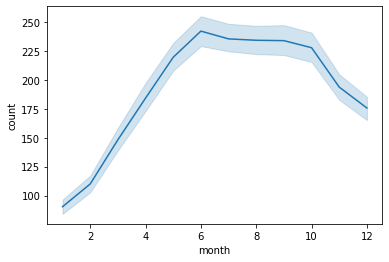

In [36]:
sns.lineplot(x=data['month'], y='count', data=data)

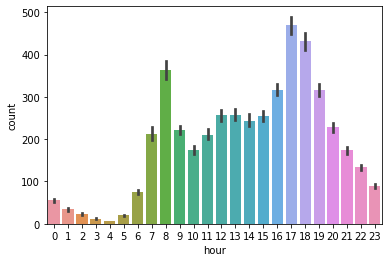

In [29]:
sns.barplot(x=data['hour'], y='count', data=data)

오전 8시, 17시, 18시에 사용량이 가장 많다. 
여기에서 첫 번째 추론은 사람들이 보통 출퇴근 용으로 많이 사용하는 것이 아닐까?!!


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

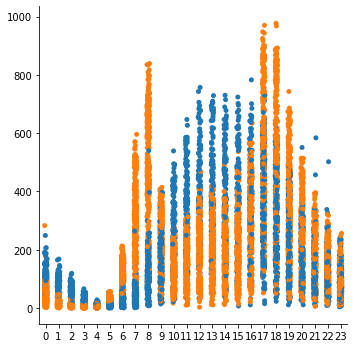

In [52]:
sns.catplot(x=data['hour'], y='count', hue='workingday',
            estimator=None,
            data=data)

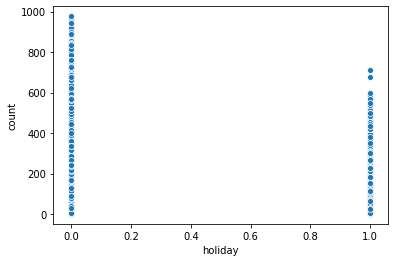

In [44]:
sns.scatterplot(x='holiday', y='count', data=data)

휴일에 대여량이 더 많은 것 같은데... 총량 비교는 어떻게 해야하지??

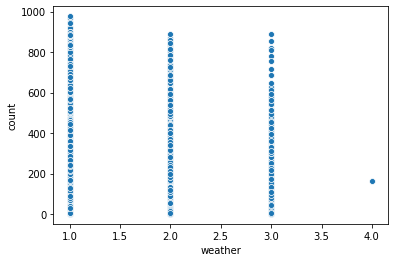

In [35]:
sns.scatterplot(x='weather', y='count', data=data)

날씨는 clear, Few clouds, 일 때 대여량이 많고, 비가 조금 올 때 대여량이 적다.

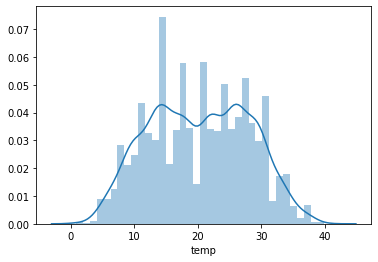

In [38]:
sns.distplot(a=data['temp'])

#여기까지 결론

1. 평일보다 휴일의 대여량이 훨씬 높다
2. 오전 8시 와 17시 18시의 평균 대여량이 높다. (출퇴근 시에 자전거를 이용하는 것 같다.) -> working day 자료 중에서 시간으로 다시 배열해보면 좋을듯.
3. 6,7,8,9,10월에 대여량이 높다.
